In [108]:
import numpy as np
import pandas as pd 
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV



In [109]:
filenames = os.listdir("D:\\Cat_Dog_Classification\\Dataset\\train")
categories = []
for name in filenames:
    category = name.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

image_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [110]:
# Trộn ngẫu nhiên dữ liệu
image_df = image_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Hiển thị 5 dòng đầu tiên để kiểm tra
print(image_df.head())

        filename  category
0    cat.493.jpg         0
1   dog.9112.jpg         1
2    cat.745.jpg         0
3  dog.11022.jpg         1
4  dog.11363.jpg         1


In [111]:
print(image_df)

            filename  category
0        cat.493.jpg         0
1       dog.9112.jpg         1
2        cat.745.jpg         0
3      dog.11022.jpg         1
4      dog.11363.jpg         1
...              ...       ...
24995   dog.6916.jpg         1
24996     cat.36.jpg         0
24997  cat.10771.jpg         0
24998   dog.1713.jpg         1
24999   dog.8788.jpg         1

[25000 rows x 2 columns]


<Axes: xlabel='category'>

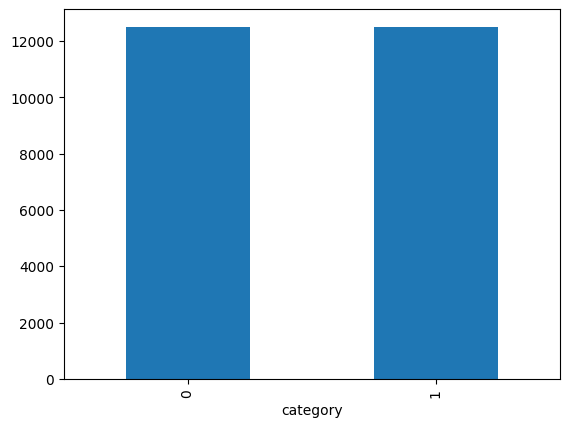

In [112]:
# visualize number of cats and dogs present in the dataframe
image_df['category'].value_counts().plot.bar() # đếm số lượng và vẽ biểu đồ cột

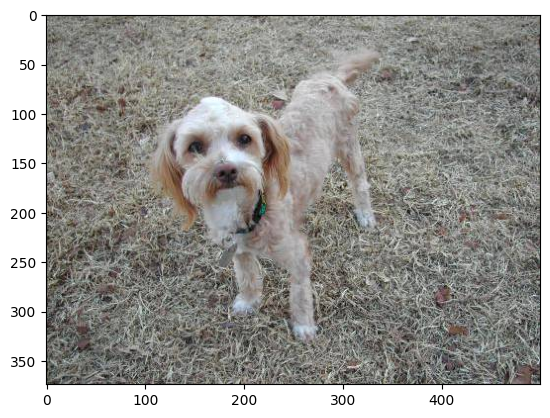

In [113]:
sample = random.choice(filenames)
image = load_img("D:\\Cat_Dog_Classification\\Dataset\\train\\"+sample)
plt.imshow(image)

In [114]:
# replace 0 as "cat" & 1 as "dog"
image_df["category"] = image_df["category"].replace({0: 'cat', 1: 'dog'}) 

In [115]:
print(image_df)

            filename category
0        cat.493.jpg      cat
1       dog.9112.jpg      dog
2        cat.745.jpg      cat
3      dog.11022.jpg      dog
4      dog.11363.jpg      dog
...              ...      ...
24995   dog.6916.jpg      dog
24996     cat.36.jpg      cat
24997  cat.10771.jpg      cat
24998   dog.1713.jpg      dog
24999   dog.8788.jpg      dog

[25000 rows x 2 columns]


In [116]:
# split the dataset for training & testing
train_df, validate_df = train_test_split(image_df, test_size=0.20, random_state=23)
# training dataset
train_df = train_df.reset_index(drop=True)
# testing dataset
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

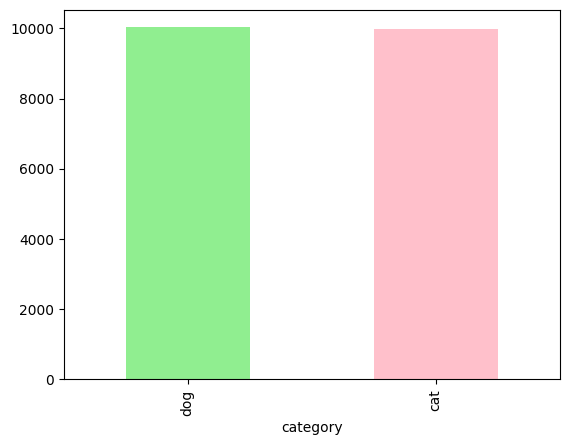

In [117]:
# see frequency of class variables in target column of training dataset
train_df['category'].value_counts().plot.bar(color=["lightgreen","pink"])

<Axes: xlabel='category'>

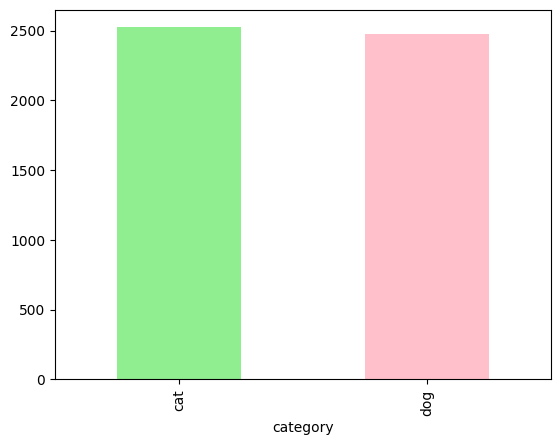

In [118]:
# see frequency of class variables in target column of testing dataset
validate_df['category'].value_counts().plot.bar(color=["lightgreen","pink"])

In [119]:
FAST_RUN = False # biến điều khiển quá trình chạy nhanh hay chậm, False cho khép model huấn luyện đầy đủ và chi tiết (mất tg hơn) True ngược lại
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT) # nhận ảnh đầu vào 128x128
IMAGE_CHANNELS=3 # kênh màu BGR
batch_size=15 # số lượng sample trong 1 lần xử lý

In [120]:
train_df_size = train_df.shape[0] # chứa sô lượng mẫu trong tập train (vd 25k ảnh)
validate_df_size = validate_df.shape[0]

In [121]:
# initializing the CNN
model = Sequential() # khởi tạo model với các lớp tuyến tính chồng lên nhau

# Convolution layer-1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution layer-2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolution layer-3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flattening layer : lớp làm phẳng
model.add(Flatten()) # convert data nhiều chiều thành 1 chiều
model.add(Dense(512, activation='relu')) # 512 noron
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# summary of model
model.summary()

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [122]:
# EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True)

# ModelCheckPoint
checkPoint = keras.callbacks.ModelCheckpoint(filepath="/content/sample_data/cd_model.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# TBoard = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [123]:
callbacks = [earlystop , checkPoint, learning_rate_reduction]

In [124]:
# this code is to show how much time required to train the model using different algorithms
from datetime import datetime
def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

In [125]:
# Tạo ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Chuẩn hóa ảnh về [0,1]

# Dùng flow_from_dataframe từ datagen (KHÔNG phải từ train_df)
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df, 
    directory="D://Cat_Dog_Classification//Dataset//train//",  # Thư mục chứa ảnh
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 20000 validated image filenames belonging to 2 classes.


In [126]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D://Cat_Dog_Classification//Dataset//train//", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [127]:
start_time=timer(None)
epochs=3 if FAST_RUN else 10
classifier = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validate_df_size//batch_size,
    steps_per_epoch=train_df_size//batch_size,
    callbacks=callbacks
)
timer(start_time)

c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.6224 - loss: 0.9289
Epoch 1: val_loss improved from inf to 0.59462, saving model to /content/sample_data/cd_model.h5


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1057s 791ms/step - accuracy: 0.6225 - loss: 0.9287 - val_accuracy: 0.7073 - val_loss: 0.5946 - learning_rate: 0.0010
Epoch 2/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 14:43 663ms/step - accuracy: 0.6667 - loss: 0.5908

c:\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.59462
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.6667 - loss: 0.5908 - val_accuracy: 0.6947 - val_loss: 0.6509 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7588 - loss: 0.5047
Epoch 3: val_loss improved from 0.59462 to 0.49735, saving model to /content/sample_data/cd_model.h5


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2823s 2s/step - accuracy: 0.7588 - loss: 0.5047 - val_accuracy: 0.7688 - val_loss: 0.4973 - learning_rate: 0.0010
Epoch 4/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 15:43 709ms/step - accuracy: 0.8000 - loss: 0.5065
Epoch 4: val_loss did not improve from 0.49735
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.8000 - loss: 0.5065 - val_accuracy: 0.7419 - val_loss: 0.5995 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.7986 - loss: 0.4382
Epoch 5: val_loss improved from 0.49735 to 0.46743, saving model to /content/sample_data/cd_model.h5


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1020s 765ms/step - accuracy: 0.7986 - loss: 0.4382 - val_accuracy: 0.7992 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 6/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 15:15 687ms/step - accuracy: 0.8667 - loss: 0.1430
Epoch 6: val_loss improved from 0.46743 to 0.44201, saving model to /content/sample_data/cd_model.h5


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.8667 - loss: 0.1430 - val_accuracy: 0.8074 - val_loss: 0.4420 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.8250 - loss: 0.3919
Epoch 7: val_loss did not improve from 0.44201
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1346s 1s/step - accuracy: 0.8250 - loss: 0.3919 - val_accuracy: 0.7954 - val_loss: 0.4595 - learning_rate: 0.0010
Epoch 8/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 14:19 645ms/step - accuracy: 0.7333 - loss: 0.6288
Epoch 8: val_loss did not improve from 0.44201

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.7333 - loss: 0.6288 - val_accuracy: 0.7868 - val_loss: 0.4955 - learning_rate: 0.0010
Epoch 9/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8693 - loss: 0.3141
Epoch 9: val_loss improved from 0.44201 to 0.40912, saving model to /content/sample_data/cd_model.h5


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1974s 1s/step - accuracy: 0.8693 - loss: 0.3141 - val_accuracy: 0.8176 - val_loss: 0.4091 - learning_rate: 5.0000e-04
Epoch 10/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 18:29 833ms/step - accuracy: 0.8667 - loss: 0.2932
Epoch 10: val_loss did not improve from 0.40912
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 0.8667 - loss: 0.2932 - val_accuracy: 0.8162 - val_loss: 0.4149 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 9.

 Time taken: 2 hours 19 minutes and 27.2 seconds. 


epochs = 10  # Chạy nhanh để test
batch_size = 8  # CPU xử lý tốt với batch nhỏ
steps_per_epoch = train_df_size // (batch_size * 4)  # Chỉ train trên 25% dữ liệu

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stopping]
)


In [128]:
model.save("cat_dog_classifier.keras")  # Lưu theo định dạng mới


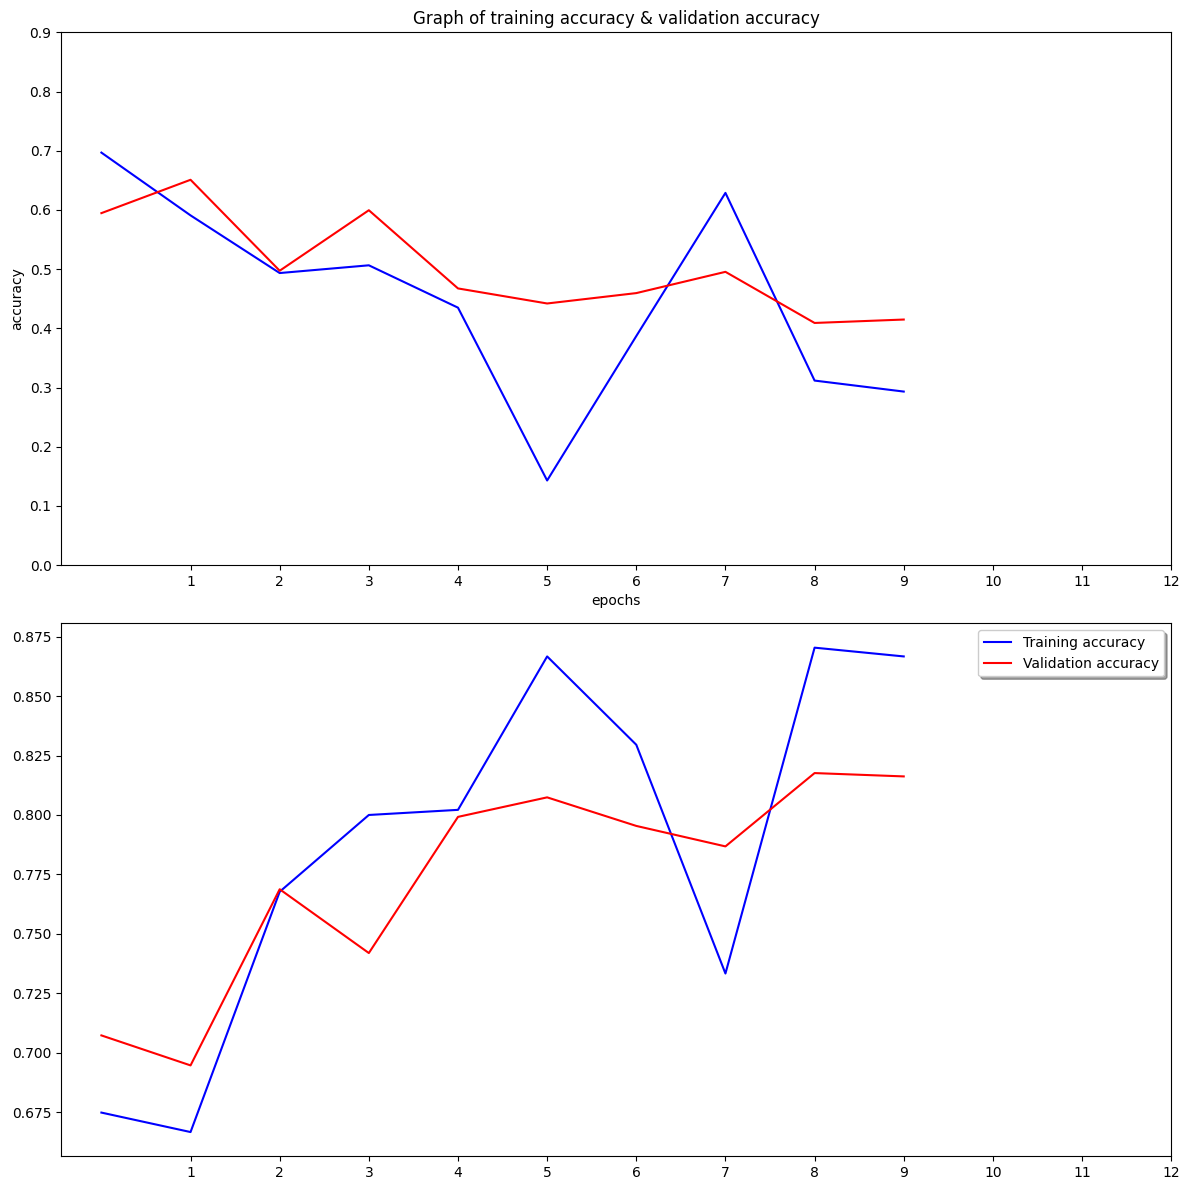

In [131]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot graph of training loss & validation loss
ax1.plot(classifier.history['loss'], color='b', label="Training loss")
ax1.plot(classifier.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(classifier.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(classifier.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 13, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [132]:
# create a dataframe and store all image files
test_filenames = os.listdir("D:\\Cat_Dog_Classification\\Dataset\\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [134]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "D:\\Cat_Dog_Classification\\Dataset\\test1\\",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 8510 validated image filenames.


In [137]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))


568/568 ━━━━━━━━━━━━━━━━━━━━ 150s 264ms/step


In [138]:
# here "category" column store the index of higher predicted value
test_df['category'] = np.argmax(predict, axis=-1)

In [143]:
# here predicted value will replace by "cat" for 0 & "dog" for 1
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

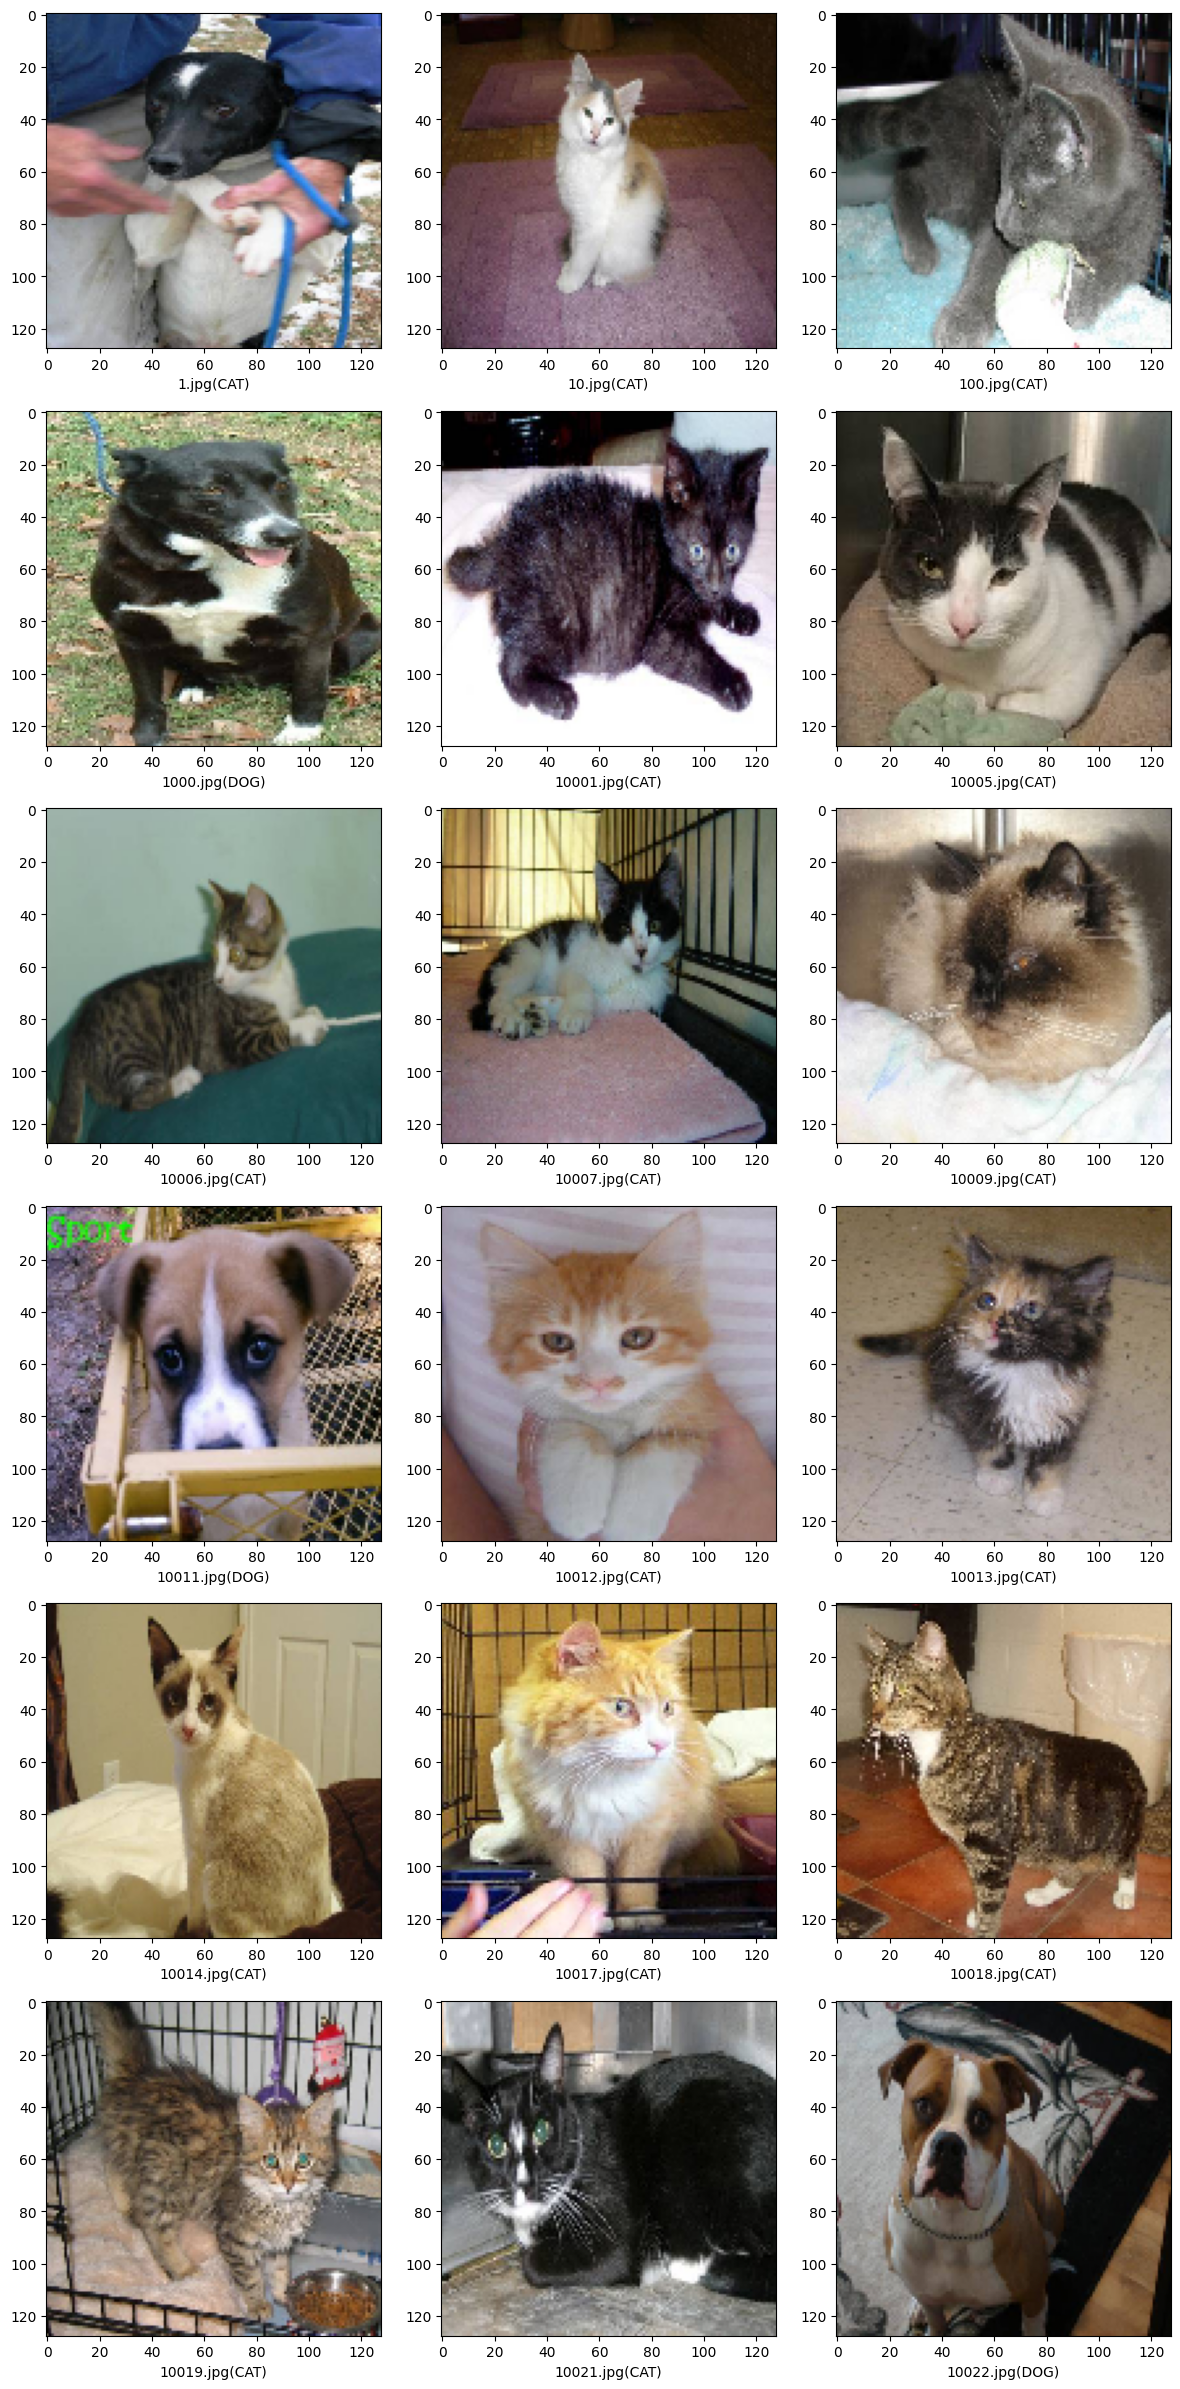

In [144]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:\\Cat_Dog_Classification\\Dataset\\test1\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category.upper()) + ')' )
plt.tight_layout()
plt.show()